In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import spearmanr

In [2]:
def annotate(ax, data):
    r, p = stats.pearsonr(data['Баллы ЕГЭ'], data['Баллы тестирования'])
    c_ount = len(data.index)
    ax.set_title(data['Дисциплина'].unique()[0])
    ax.set_ylim([0, 10])
    ax.text(.02, .95, 'r = {:.4f}, p = {:.0e}, кол-во = {}'.format(r, p, c_ount), transform=ax.transAxes)
#plt.annotate('r = {:.4f}, p = {:.0e}'.format(r, p), xy=(0.1, 0.8), xycoords='axes fraction', bbox = bbox)

In [3]:
df_ege_raw = pd.read_excel("БаллЗачисл2023.xlsx", usecols=['L_ID', 'Сумма баллов', 'Б.1.И', 'Гражд','Группа', 'Б.1.Д', 'Б.1', 'Б.2.И', 'Б.2.Д', 'Б.2', 'Б.3.Д', 'Б.3.И', 'Б.3',	'ИД'], index_col=0)
df_ege_raw = df_ege_raw[df_ege_raw['Сумма баллов'] != 'н/с']
df_ege_raw = df_ege_raw[df_ege_raw['Сумма баллов'] != 'н/р']
df_ege_raw = df_ege_raw[df_ege_raw['Б.1'].notna()]
df_ege_raw['Сумма баллов'] = df_ege_raw['Сумма баллов'].astype(str).astype(int)
df_ege_raw['Б.1'] = df_ege_raw['Б.1'].astype(str).astype(int)
df_ege_raw['Б.2'] = df_ege_raw['Б.2'].astype(str).astype(int)
df_ege_raw['Б.3'] = df_ege_raw['Б.3'].astype(float).astype(int)
#df_ege_raw['ИД'] = df_ege_raw['ИД'].astype(float).astype(int)
df_ege_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1908 entries, 59086 to 656177
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Гражд         1908 non-null   object 
 1   Группа        1908 non-null   object 
 2   Сумма баллов  1908 non-null   int32  
 3   Б.1.Д         1908 non-null   object 
 4   Б.1.И         1908 non-null   object 
 5   Б.1           1908 non-null   int32  
 6   Б.2.Д         1908 non-null   object 
 7   Б.2.И         1908 non-null   object 
 8   Б.2           1908 non-null   int32  
 9   Б.3.Д         1908 non-null   object 
 10  Б.3.И         1908 non-null   object 
 11  Б.3           1908 non-null   int32  
 12  ИД            752 non-null    float64
dtypes: float64(1), int32(4), object(8)
memory usage: 178.9+ KB


In [4]:
df_test_raw = pd.read_excel("ВТ 2023.xlsx", usecols=['ID', 'Результат ', 'Математика', 'Физика', 'Химия', 'Информатика'], index_col=0)
df_test_raw  = df_test_raw[df_test_raw['Результат '] != '-']
df_test_raw = df_test_raw[~df_test_raw.index.duplicated(keep='first')]
df_test_raw['Результат '] = df_test_raw['Результат '].astype(str).astype(float)
df_test_raw['Математика'] = df_test_raw['Математика'].astype(str).astype(float)
df_test_raw['Физика'] = df_test_raw['Физика'].astype(float).astype(float)
df_test_raw['Химия'] = df_test_raw['Химия'].astype(float).astype(float)
df_test_raw['Информатика'] = df_test_raw['Информатика'].astype(float).astype(float)
df_test_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1513 entries, 360962 to 649198
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Результат    1513 non-null   float64
 1   Математика   1513 non-null   float64
 2   Физика       1513 non-null   float64
 3   Химия        1513 non-null   float64
 4   Информатика  1513 non-null   float64
dtypes: float64(5)
memory usage: 70.9 KB


In [5]:
df_ege = df_ege_raw[[ 'Сумма баллов', 'Б.1.И']]

In [6]:
df_test = df_test_raw[['Результат ']]

In [7]:
df_ege_test = df_ege.join(df_test)

In [8]:
df_ege_test = df_ege_test[df_ege_test['Результат '].notna()]

In [9]:
df_ege_test.to_excel('test.xlsx')

In [10]:
df_ege_test = df_ege_test.rename(columns={"Сумма баллов": "Баллы ЕГЭ (ВИ)", "Результат ": "Баллы входного тестирования"})

Баллы ЕГЭ и ВИ все вместе

c:\Users\seismopro\AppData\Local\anaconda3\Lib\site-packages\seaborn\regression.py:582: UserWarning: sharex is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)
c:\Users\seismopro\AppData\Local\anaconda3\Lib\site-packages\seaborn\regression.py:582: UserWarning: sharey is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)
c:\Users\seismopro\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


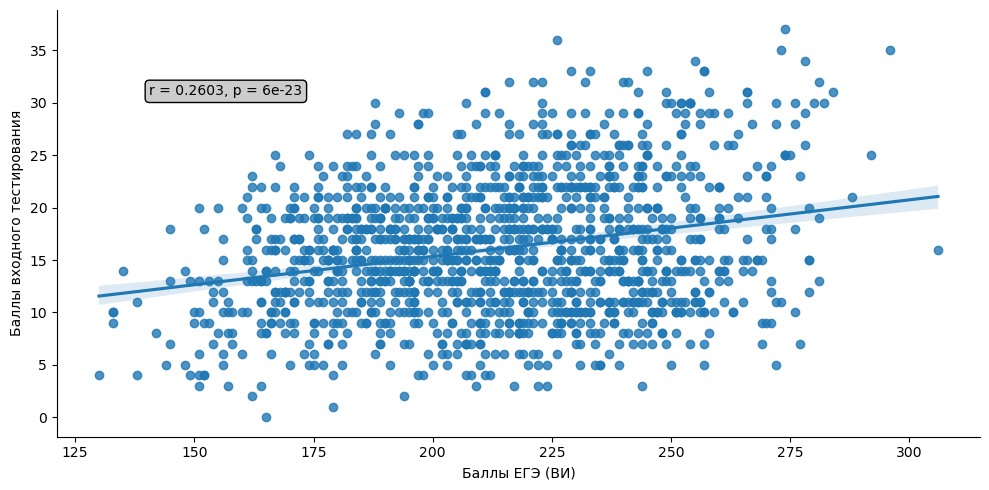

In [11]:
bbox = dict(boxstyle ="round", fc ="0.8")
#plt.figure(figsize = (20,5))
g = sns.lmplot(data=df_ege_test, x='Баллы ЕГЭ (ВИ)', y='Баллы входного тестирования', aspect=2, sharey=False, sharex=False)
r, p = stats.pearsonr(df_ege_test['Баллы ЕГЭ (ВИ)'], df_ege_test['Баллы входного тестирования'])
plt.annotate('r = {:.4f}, p = {:.0e}'.format(r, p), xy=(0.1, 0.8), xycoords='axes fraction', bbox = bbox)
plt.show()

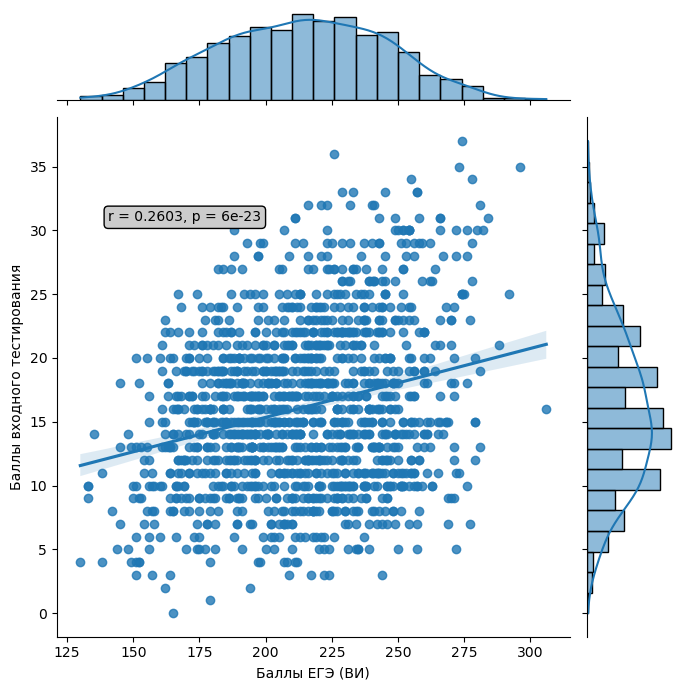

In [12]:
sns.jointplot(data=df_ege_test, x='Баллы ЕГЭ (ВИ)', y='Баллы входного тестирования', kind="reg", height=7)
plt.annotate('r = {:.4f}, p = {:.0e}'.format(r, p), xy=(0.1, 0.8), xycoords='axes fraction', bbox = bbox)
plt.show()

<Axes: xlabel='Баллы ЕГЭ (ВИ)', ylabel='Кол-во студентов'>

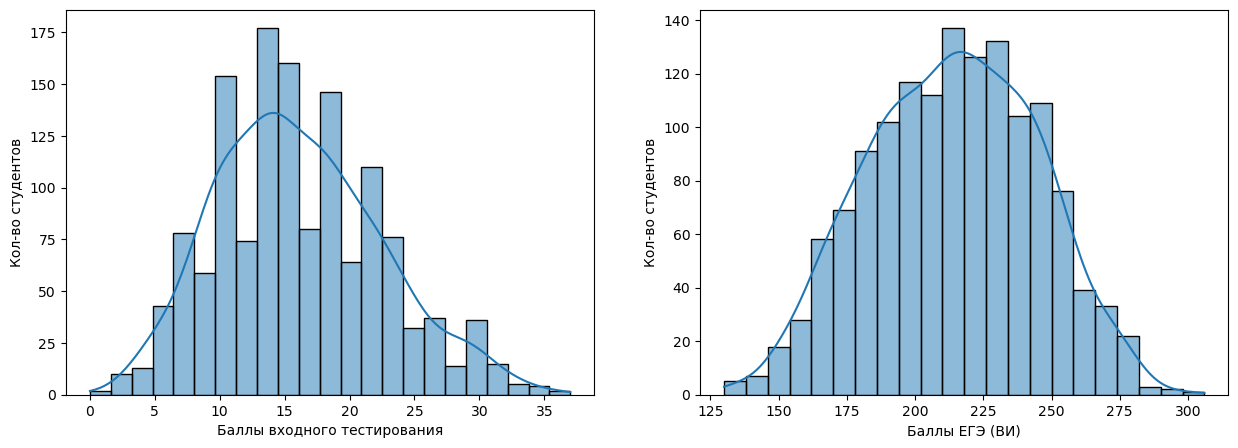

In [13]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))
for ax in axes:
    ax.set(ylabel="Кол-во студентов")
sns.histplot(data=df_ege_test, x="Баллы входного тестирования", kde=True, ax=axes[0])
sns.histplot(data=df_ege_test, x="Баллы ЕГЭ (ВИ)", kde=True,  ax=axes[1])


Отдельно баллы ЕГЭ и баллы ВИ

In [14]:
df_ege_test_ege = df_ege_test[df_ege_test['Б.1.И'] == 'ЕГЭ']
df_ege_test_ege = df_ege_test_ege.rename(columns={"Баллы ЕГЭ (ВИ)": "Баллы ЕГЭ"})

c:\Users\seismopro\AppData\Local\anaconda3\Lib\site-packages\seaborn\regression.py:582: UserWarning: sharex is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)
c:\Users\seismopro\AppData\Local\anaconda3\Lib\site-packages\seaborn\regression.py:582: UserWarning: sharey is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)
c:\Users\seismopro\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


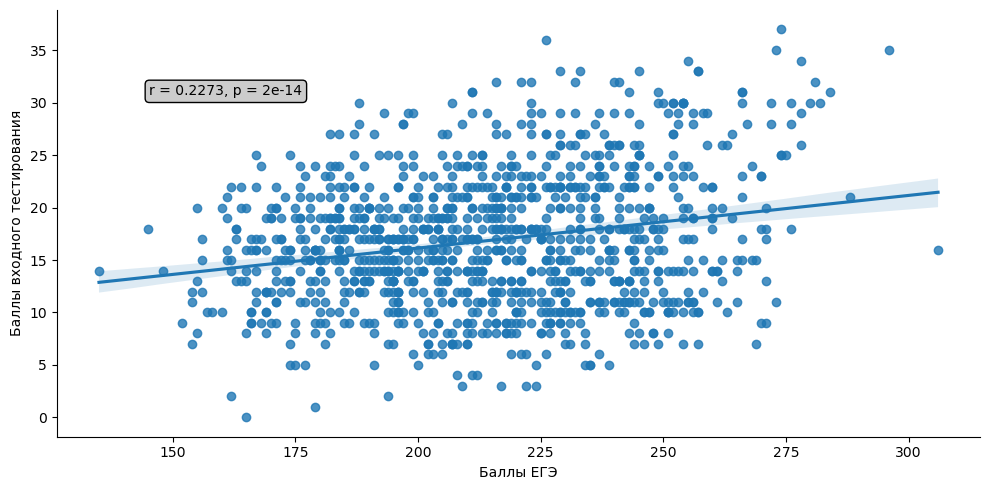

In [15]:
bbox = dict(boxstyle ="round", fc ="0.8")
#plt.figure(figsize = (20,5))
g = sns.lmplot(data=df_ege_test_ege, x='Баллы ЕГЭ', y='Баллы входного тестирования', aspect=2, sharey=False, sharex=False)
r, p = stats.pearsonr(df_ege_test_ege['Баллы ЕГЭ'], df_ege_test_ege['Баллы входного тестирования'])
plt.annotate('r = {:.4f}, p = {:.0e}'.format(r, p), xy=(0.1, 0.8), xycoords='axes fraction', bbox = bbox)
plt.show()

In [16]:
df_ege_test_vi = df_ege_test[df_ege_test['Б.1.И'] != 'ЕГЭ']
df_ege_test_vi = df_ege_test_vi.rename(columns={"Баллы ЕГЭ (ВИ)": "Баллы ВИ"})

c:\Users\seismopro\AppData\Local\anaconda3\Lib\site-packages\seaborn\regression.py:582: UserWarning: sharex is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)
c:\Users\seismopro\AppData\Local\anaconda3\Lib\site-packages\seaborn\regression.py:582: UserWarning: sharey is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)
c:\Users\seismopro\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


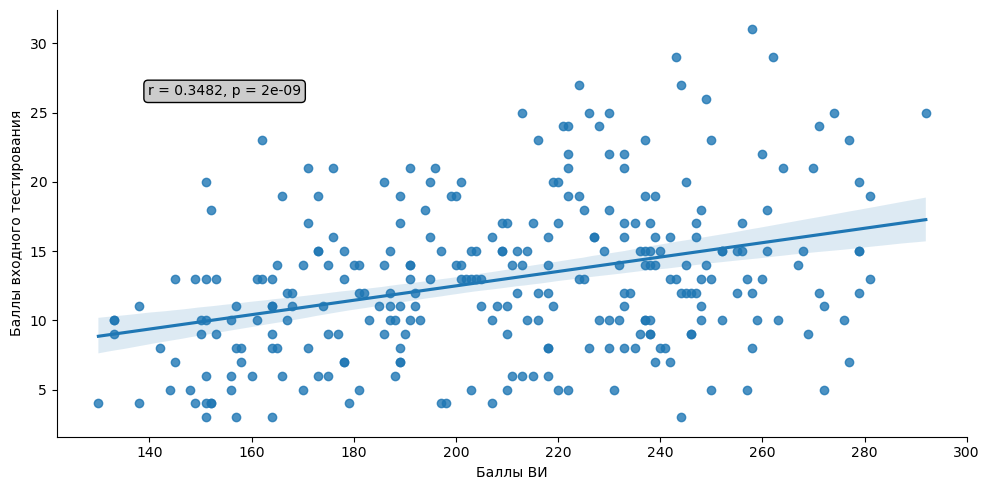

In [17]:
bbox = dict(boxstyle ="round", fc ="0.8")
#plt.figure(figsize = (20,5))
g = sns.lmplot(data=df_ege_test_vi, x='Баллы ВИ', y='Баллы входного тестирования', aspect=2, sharey=False, sharex=False)
r, p = stats.pearsonr(df_ege_test_vi['Баллы ВИ'], df_ege_test_vi['Баллы входного тестирования'])
plt.annotate('r = {:.4f}, p = {:.0e}'.format(r, p), xy=(0.1, 0.8), xycoords='axes fraction', bbox = bbox)
plt.show()

In [18]:
df_ege_disc = df_ege_raw[df_ege_raw['Б.1.И'] == "ЕГЭ"]

In [19]:
df_ege_disc = df_ege_disc[['Б.1.Д', 'Б.1', 'Б.2.Д', 'Б.2', 'Б.3.Д', 'Б.3']]
df_ege_disc_1 = df_ege_disc[['Б.1.Д', 'Б.1']]
df_ege_disc_1 = df_ege_disc_1.rename(columns={"Б.1.Д": "Дисциплина", "Б.1": "Баллы ЕГЭ"})
df_ege_disc_2 = df_ege_disc[['Б.2.Д', 'Б.2']]
df_ege_disc_2 = df_ege_disc_2.rename(columns={"Б.2.Д": "Дисциплина", "Б.2": "Баллы ЕГЭ"})
df_ege_disc_3 = df_ege_disc[['Б.3.Д', 'Б.3']]
df_ege_disc_3 = df_ege_disc_3.rename(columns={"Б.3.Д": "Дисциплина", "Б.3": "Баллы ЕГЭ"})
df_ege_disc_all = pd.concat([df_ege_disc_1, df_ege_disc_2, df_ege_disc_3])

In [20]:
unique_disc = df_ege_disc_all['Дисциплина'].unique()
list(unique_disc)

['ИиИ', 'Х', 'Ф', 'М', 'Б', 'Г', 'ОКН', 'МОТН', 'О', 'РЯ']

In [21]:
fiter_list = ['ИиИ', 'Х', 'Ф', 'М']

In [22]:
df_ege_disc_all  = df_ege_disc_all[df_ege_disc_all['Дисциплина'].isin(fiter_list)] 
df_ege_disc_all = df_ege_disc_all.reset_index()
df_ege_disc_all = df_ege_disc_all.replace({'ИиИ': 'Информатика', 'Х': 'Химия', "М": "Математика", 'Ф' : 'Физика'})

In [23]:
df_test_disc = df_test_raw[['Математика', 'Физика', 'Химия', 'Информатика']]
#df_test_disc = df_test_disc.rename(columns={"Математика": "М", "Физика": "Ф", "Химия": "Х", "Информатика": "ИиИ" })
df_test_disc = pd.melt(df_test_disc, ignore_index = False, value_vars=['Математика', 'Физика', 'Химия', 'Информатика'])
df_test_disc = df_test_disc.reset_index()

In [24]:
df_ege_disc_all = df_ege_disc_all.merge(df_test_disc, left_on=['L_ID', 'Дисциплина'], right_on=['ID', 'variable'])
df_ege_disc_all = df_ege_disc_all[['L_ID', 'Дисциплина', 'Баллы ЕГЭ', 'value']]
df_ege_disc_all = df_ege_disc_all.rename(columns={'value': 'Баллы тестирования'})

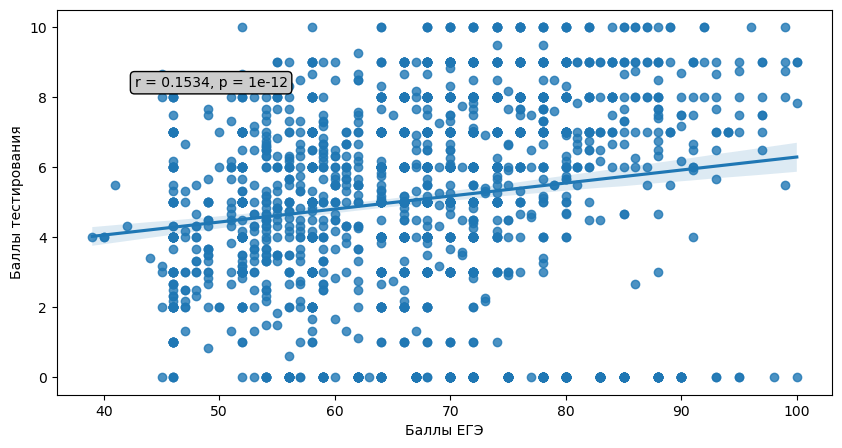

In [25]:
plt.figure(figsize=(10,5))
sns.regplot(data=df_ege_disc_all, x='Баллы ЕГЭ', y='Баллы тестирования')
#sns.relplot(data=df_ege_disc_all, x='Баллы ЕГЭ', y='Баллы тестирования', col = 'Дисциплина',  kind="scatter")
r, p = stats.pearsonr(df_ege_disc_all['Баллы ЕГЭ'], df_ege_disc_all['Баллы тестирования'])
plt.annotate('r = {:.4f}, p = {:.0e}'.format(r, p), xy=(0.1, 0.8), xycoords='axes fraction', bbox = bbox)
plt.show()

c:\Users\seismopro\AppData\Local\anaconda3\Lib\site-packages\seaborn\regression.py:582: UserWarning: sharex is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)
c:\Users\seismopro\AppData\Local\anaconda3\Lib\site-packages\seaborn\regression.py:582: UserWarning: sharey is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)
c:\Users\seismopro\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


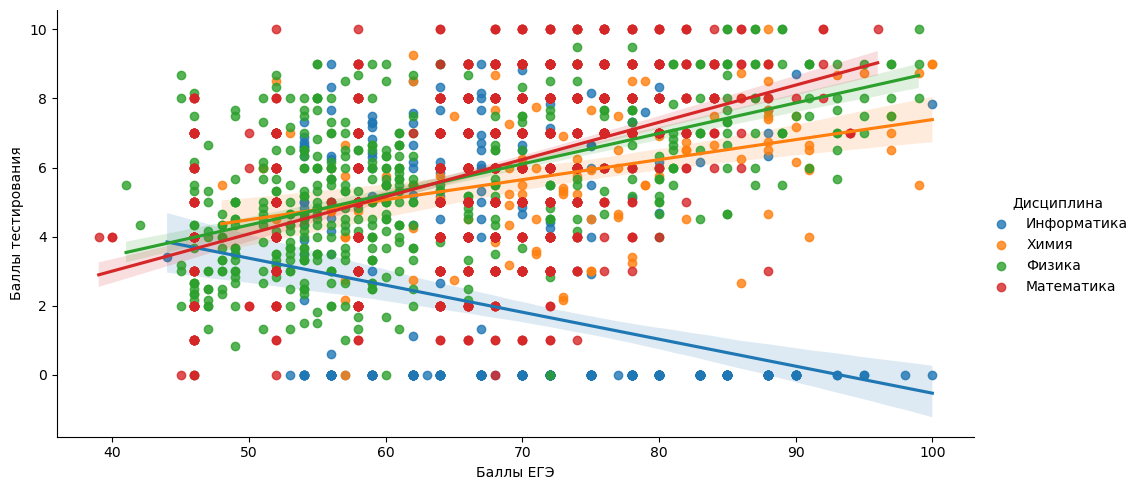

In [26]:
sns.lmplot(data=df_ege_disc_all, x='Баллы ЕГЭ', y='Баллы тестирования', aspect=2, sharey=False, sharex=False,  hue="Дисциплина")

In [27]:
df_ege_disc_all = df_ege_disc_all[df_ege_disc_all['Баллы тестирования'] > 0] ## 0 баллов - это он так на самом деле сдал, или не обязан был сдавать?

In [28]:
df_ege_math = df_ege_disc_all[df_ege_disc_all['Дисциплина'] == 'Математика']
df_ege_phys = df_ege_disc_all[df_ege_disc_all['Дисциплина'] == 'Физика']
df_ege_chem = df_ege_disc_all[df_ege_disc_all['Дисциплина'] == 'Химия']
df_ege_info = df_ege_disc_all[df_ege_disc_all['Дисциплина'] == 'Информатика']

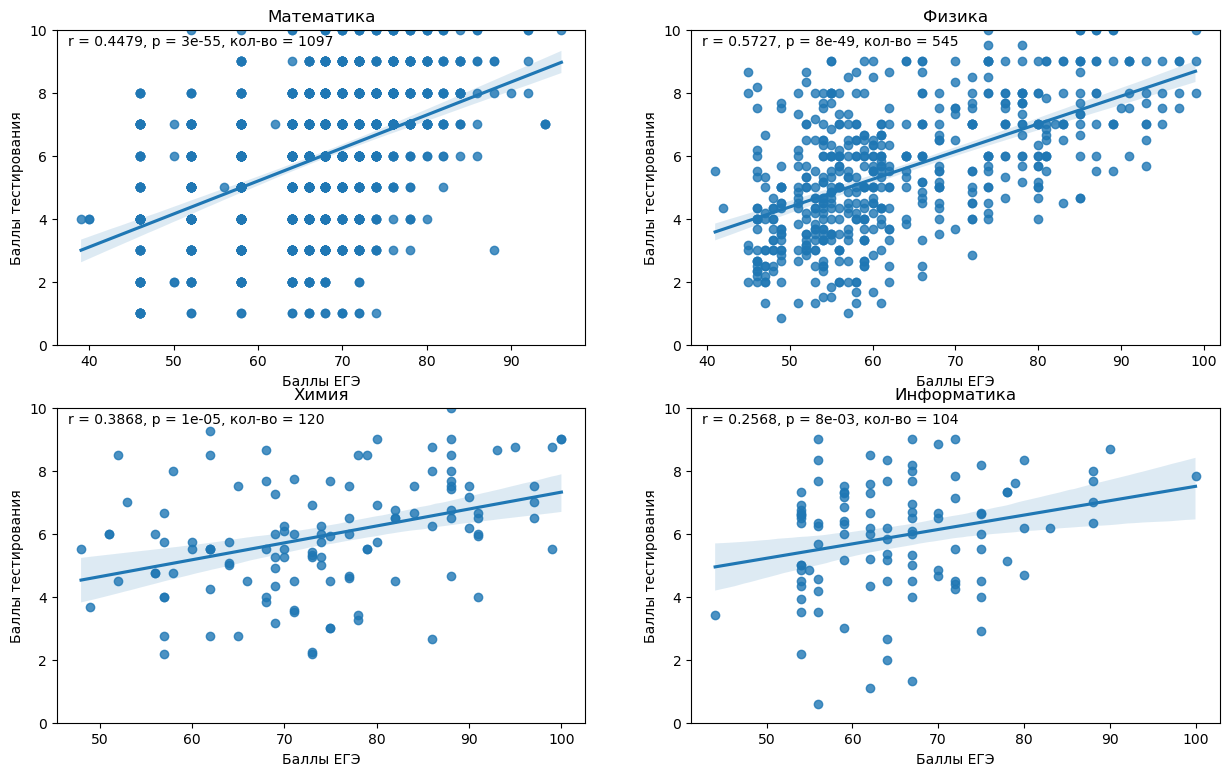

In [29]:
fig, axes = plt.subplots(2, 2, figsize = (15,9)) #, sharey=True)

ax = sns.regplot(data=df_ege_math, x='Баллы ЕГЭ', y='Баллы тестирования', ax=axes[0][0])
annotate(ax,data=df_ege_math)

ax = sns.regplot(data=df_ege_phys, x='Баллы ЕГЭ', y='Баллы тестирования', ax=axes[0][1])
annotate(ax,data=df_ege_phys)

ax = sns.regplot(data=df_ege_chem, x='Баллы ЕГЭ', y='Баллы тестирования', ax=axes[1][0])
annotate(ax,data=df_ege_chem)

ax = sns.regplot(data=df_ege_info, x='Баллы ЕГЭ', y='Баллы тестирования', ax=axes[1][1])
annotate(ax,data=df_ege_info)
#plt.tight_layout()
plt.show()